## 2.1.1 Phép Tích Chập

Các bộ lọc tuyến tính được thực hiện bằng cách sử dụng phép tích chập 2D. Các thao tác như làm mờ và phát hiện biên dạng được thực hiện bằng tích chập. Hãy xem xét một kernel 3x3 như sau:

```python
h = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]


### Trong OpenCV, phép tích chập được thực hiện bằng cách sử dụng hàm filter2D. Cú pháp của hàm là:
- `dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`

- Với các tham số:

    - `src`: hình ảnh đầu vào.
    - `dst`: hình ảnh đầu ra có cùng kích thước và cùng số kênh như `src`.
    - `ddepth`: độ sâu mong muốn của hình ảnh đích.
    - `kernel`: kernel tích chập, một ma trận số thực đơn kênh; nếu bạn muốn áp dụng các kernel khác nhau cho các kênh khác nhau, hãy tách hình ảnh thành các mặt phẳng màu riêng biệt bằng cách sử - dụng `split` và xử lý chúng riêng lẻ.
    - `anchor`: điểm neo của kernel, cho biết vị trí tương đối của điểm được lọc trong kernel; điểm neo nên nằm trong kernel; giá trị mặc định `(-1, -1)` nghĩa là điểm neo ở trung tâm kernel.
    - `delta`: một giá trị tùy chọn được thêm vào các pixel đã lọc trước khi lưu chúng vào `dst`.
    - `borderType`: phương pháp ngoại suy pixel.

Các tham số tùy chọn như điểm neo (`anchor`), `delta` và `borderType` hầu như không bao giờ được thay đổi khỏi các giá trị mặc định của chúng.

Đối với hàm `cv2.filter2D` trong tài liệu OpenCV, thuật ngữ tích chập (convolution) bị sử dụng sai thay vì phép tương quan chéo (cross-correlation). Thực tế, hàm này thực hiện phép tương quan chéo, và nó chỉ giống với tích chập khi kernel bộ lọc là đối xứng!

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


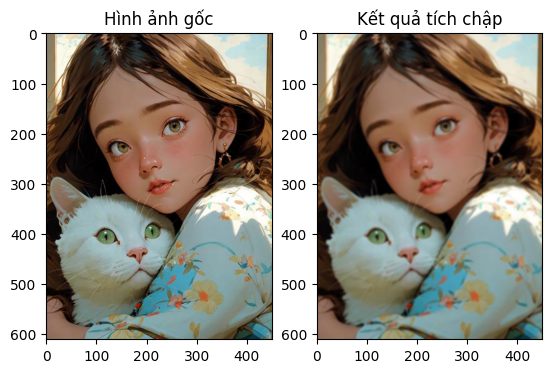

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\Image-Proccessing\pratice\week_1\img\00750.jpeg')
if image is None:  # Kiểm tra nếu tệp không tồn tại
    print("Could not open the image")

ker_size = 5
# Bộ lọc hộp: kernel 5x5 với tổng tất cả các phần tử bằng 1
kernel = np.ones((ker_size, ker_size), dtype=np.float32) / ker_size**2
print(kernel)

result = cv2.filter2D(image, -1, kernel, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)

plt.figure()
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hình ảnh gốc")
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Kết quả tích chập")
plt.show()


Tham số thứ hai của hàm `cv2.filter2D` (độ sâu - `depth`) được đặt là `-1`, nghĩa là độ sâu bit của hình ảnh đầu ra sẽ giống với hình ảnh đầu vào. Vì vậy, nếu hình ảnh đầu vào thuộc kiểu `uint8`, thì hình ảnh đầu ra cũng sẽ có cùng kiểu dữ liệu.

### Bài tập 2.1: Thay đổi kernel đã sử dụng trong ví dụ trước và phân tích kết quả
Thử sử dụng một kernel mà không cần chuẩn hóa các giá trị bằng số lượng phần tử trong kernel. Sự thay đổi này ảnh hưởng như thế nào đến độ sáng của hình ảnh đầu ra so với hình ảnh đầu vào?

[[0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]
 [0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]
 [0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]
 ...
 [0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]
 [0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]
 [0.0004 0.0004 0.0004 ... 0.0004 0.0004 0.0004]]


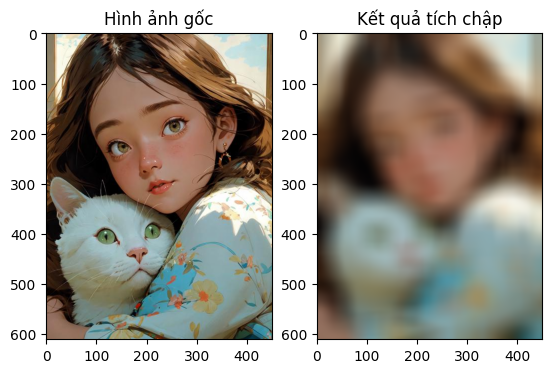

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\Image-Proccessing\pratice\week_1\img\00750.jpeg')
if image is None:  # Kiểm tra nếu tệp không tồn tại
    print("Could not open the image")

ker_size = 50
# Bộ lọc hộp: kernel 5x5 với tổng tất cả các phần tử bằng 1
kernel = np.ones((ker_size, ker_size), dtype=np.float32) / ker_size**2
print(kernel)

result = cv2.filter2D(image, -1, kernel, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)

plt.figure()
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hình ảnh gốc")
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Kết quả tích chập")
plt.show()


Phân tích kết quả:
- Khi không chuẩn hóa các giá trị trong kernel, các giá trị pixel được nhân với các phần tử của kernel và sau đó được cộng lại, dẫn đến tăng độ sáng tổng thể của hình ảnh đầu ra. Điều này là do các giá trị trong kernel chưa được chia cho số lượng phần tử của nó, làm cho giá trị trung bình của các pixel cao hơn nhiều so với giá trị đầu vào.

- So sánh với hình ảnh gốc: Hình ảnh đầu ra có thể xuất hiện sáng hơn hoặc thậm chí bị "cháy sáng" (overexposed) ở một số vùng nếu các giá trị pixel vượt quá phạm vi dữ liệu (thường là từ 0 đến 255 cho hình ảnh loại `uint8`).

- Bài học rút ra: Việc chuẩn hóa kernel giúp duy trì độ sáng tương đối của hình ảnh, trong khi việc không chuẩn hóa có thể làm thay đổi độ sáng và độ tương phản của kết quả đầu ra.

### Bài tập 2.2: Thử nghiệm các kernel sau trên hình ảnh đầu vào "white_square.jpg" và "hop.jpg"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh đầu vào
image1 = cv2.imread('white_square.jpg')
image2 = cv2.imread('hop.jpg')

# Kiểm tra nếu hình ảnh không tồn tại
if image1 is None or image2 is None:
    print("Could not open one of the images")

# Định nghĩa các kernel
kernels = {
    "h1": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32),
    "h2": np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]], dtype=np.float32),
    "h3": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32),
    "h4": (1/16) * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
}

# Hàm để áp dụng kernel và hiển thị kết quả
def apply_kernel_and_show(image, kernel, kernel_name):
    result = cv2.filter2D(image, -1, kernel)
    plt.figure()
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Hình gốc ({kernel_name})")
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Kết quả tích chập ({kernel_name})")
    plt.show()

# Áp dụng các kernel lên hình ảnh "white_square.jpg"
for kernel_name, kernel in kernels.items():
    apply_kernel_and_show(image1, kernel, kernel_name)

# Áp dụng các kernel lên hình ảnh "hop.jpg"
for kernel_name, kernel in kernels.items():
    apply_kernel_and_show(image2, kernel, kernel_name)
